### Import modules

In [1]:
cd

/home/jovyan


In [2]:
import datacube 
from datacube.virtual import catalog_from_file
dc = datacube.Datacube()

service = '/home/jovyan/development/'
from datacube.helpers import write_geotiff
import numpy as np
import sys
import xarray as xr
from itertools import groupby

sys.path.append("Scripts")
from dea_plotting import rgb
from dea_plotting import display_map

# product = catalog['salty']
# data = product.load(dc, **query)
# (data.vssi.squeeze()).plot.imshow()

### Locations

### View the selected location

In [10]:
# Set the central latitude and longitude
central_lat = -42.827936 
central_lon = 145.673772

# Set the buffer to load around the central coordinates
buffer = 0.1

# Compute the bounding box for the study area
study_area_lat = (central_lat - buffer, central_lat + buffer)
study_area_lon = (central_lon - buffer, central_lon + buffer)

display_map(x=study_area_lon, y=study_area_lat, margin=-0.2)

### Set parameters

In [13]:
# x = (350000, 400000)
# y = (-3500000, -3450000)

# Name
# area_name = 'Leichhardt'
x = study_area_lon#(min_x,max_x)
y = study_area_lat#(min_y,max_y)
res = (-100, 100)
crs = "EPSG:4326"
time = ("2015-01-01", "2015-12-31")
query =({'time': time,
             'x':x,
            'y':y,
            'crs':crs,
            'resolution':res,
            'group_by': 'solar_day'})
catalog = catalog_from_file(str(service)+'livingearth_australia/le_plugins/virtual_product_cat.yaml')

### Add le plugins

In [14]:
# import importlib
# import sys
# import os
# from datacube.virtual import DEFAULT_RESOLVER
# sys.path.append(os.path.abspath(str(service)+"livingearth_australia/le_plugins"))
# sys.path.append(str(service)+"dea-notebooks/Scripts")
# sys.path.append(str(service)+"livingearth_australia")

# #see what's already in the resolver 
# DEFAULT_RESOLVER.lookup_table['transform']

# # Now we add the transformation we're testing
# # Get location of transformation
# transformation = "le_plugins.FC_summary"
# trans_loc = importlib.import_module(transformation)
# trans_class = transformation.split('.')[-1]
# DEFAULT_RESOLVER.register('transform', trans_class, getattr(trans_loc, trans_class) )

In [15]:
# #see what's now in the resolver 
# DEFAULT_RESOLVER.lookup_table['transform']

### Load data
`ls_fc_wofs_masked_recipe` and `wofs_daily_recipe` both go into FC_summary

In [32]:
product = catalog['ls_fc_wofs_masked']
gm = product.load(dc, **query)

In [33]:
gm

<xarray.Dataset>
Dimensions:      (time: 33, x: 201, y: 201)
Coordinates:
    spatial_ref  int32 3577
  * y            (y) float64 -4.764e+06 -4.764e+06 ... -4.784e+06 -4.784e+06
  * x            (x) float64 1.149e+06 1.15e+06 1.15e+06 ... 1.169e+06 1.169e+06
  * time         (time) datetime64[ns] 2015-01-10T23:51:12 ... 2015-12-28T23:53:58.500000
Data variables:
    BS           (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 ... -1 -1 -1 -1 -1 -1
    PV           (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 ... -1 -1 -1 -1 -1 -1
    NPV          (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 ... -1 -1 -1 -1 -1 -1
    UE           (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 ... -1 -1 -1 -1 -1 -1
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

In [34]:
pv0 = gm.PV>0
pv0

<xarray.DataArray 'PV' (time: 33, y: 201, x: 201)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ...,  True, False, False],
        [False, False, False, ...,  True, False, False],
        [False, False, False, ...,  True,  True, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       ...,

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
    spatial_ref  int32 3577
  * y            (y) float64 -4.764e+06 -4.764e+06 ... -4.784e+06 -4.784e+06
  * x            (x) float64 1.149e+06 1.15e+06 1.15e+06 ... 1.169e+06 1.169e+06
  * time         (time) datetime64[ns] 2015-01-10T23:51:12 ... 2015-12-28T23:53:58.500000

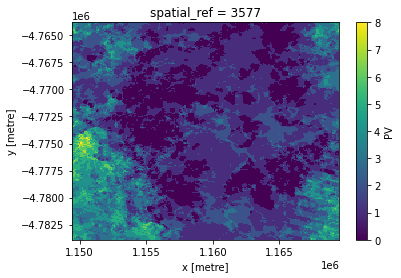

In [35]:
count_pv = pv0.sum(dim='time')
one_ob_pv = count >1
count_pv.plot()

In [36]:
count_pv

<xarray.DataArray 'PV' (y: 201, x: 201)>
array([[3, 3, 3, ..., 5, 5, 5],
       [3, 4, 4, ..., 5, 4, 4],
       [4, 4, 4, ..., 5, 5, 4],
       ...,
       [6, 5, 5, ..., 4, 4, 4],
       [6, 6, 4, ..., 4, 4, 4],
       [6, 5, 4, ..., 3, 3, 3]])
Coordinates:
    spatial_ref  int32 3577
  * y            (y) float64 -4.764e+06 -4.764e+06 ... -4.784e+06 -4.784e+06
  * x            (x) float64 1.149e+06 1.15e+06 1.15e+06 ... 1.169e+06 1.169e+06

In [38]:
if count_pv == 1:
    # executing consecutive_count function
    rc = 1
    
elif count != 1:
    rc = 2

print(rc)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

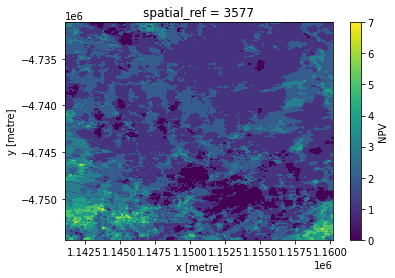

In [61]:
npv0 = gm.NPV>0
count_npv = npv0.sum(dim='time')
one_ob_npv = count >1
count_npv.plot()

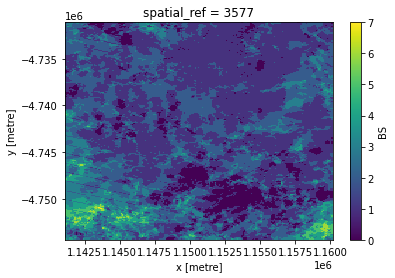

In [62]:
bs0 = gm.BS>0
count_bs = bs0.sum(dim='time')
one_ob_bs = count >1
count_bs.plot()

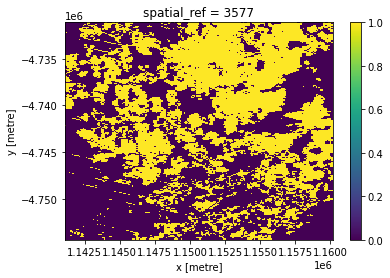

In [59]:
combo_one_ob = ((count_bs + count_pv + count_npv)==3)
combo_one_ob.plot()

### Make simplified monthly summaries

In [63]:
data_month = gm.groupby('time.month').median(dim='time')   
data_month

<xarray.Dataset>
Dimensions:      (month: 11, x: 191, y: 233)
Coordinates:
    spatial_ref  int32 3577
  * x            (x) float64 1.141e+06 1.141e+06 1.141e+06 ... 1.16e+06 1.16e+06
  * y            (y) float64 -4.731e+06 -4.731e+06 ... -4.754e+06 -4.754e+06
  * month        (month) int64 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    BS           (month, y, x) float64 -1.0 -1.0 -1.0 -1.0 ... 2.5 3.0 3.0 4.0
    PV           (month, y, x) float64 -1.0 -1.0 -1.0 -1.0 ... 33.5 33.5 32.0
    NPV          (month, y, x) float64 -1.0 -1.0 -1.0 -1.0 ... 11.5 11.5 12.5
    UE           (month, y, x) float64 -1.0 -1.0 -1.0 -1.0 ... 12.5 13.0 12.5

In [72]:
import matplotlib.pyplot as plt

In [76]:
# Create mask where PV > BS
PV_dominant = data_month['PV'] > data_month['BS']
PV_dominant_nan = PV_dominant.where((data_month['PV'] >= 0) & (data_month['BS'] >= 0))

NOTE: we now have monthy summaries

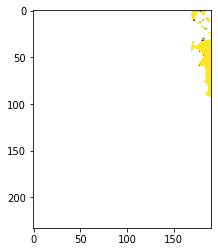

In [77]:
plt.imshow(PV_dominant_nan.isel(month=0))

### Run consectutive count
- Takes in a numpy array (tv_numpy)
- Takes in an empty numpy array with same shape as tv_numpy
- Require consectutive is just a number (e.g. must be consecutive 2 times)

In [92]:
tv_mask = PV_dominant_nan

# make values of 2 == 1 (end result in binary veg mask)
tv_mask_drop = np.where(tv_mask >=1, 1, 0)
tv_mask_xr = xr.DataArray(tv_mask_drop, coords=tv_mask.coords, dims=tv_mask.dims)
#print('tv_mask_xr',tv_mask_xr)

# Pull tv as numpy array
tv_numpy = tv_mask_xr.values
print('tv_numpy',tv_numpy.shape)

# we have made a binary multi-temporal array

tv_numpy (11, 233, 191)


In [93]:
# Set up array for output (faster to pre-allocate for numba).
# Needs to be float32 for NaN
consecutive_numpy = np.empty((tv_numpy.shape[1], tv_numpy.shape[2]), dtype=np.float32)

In [94]:
required_consecutive = 2

In [99]:
# Run function to get array of with 1 where number of consecutive values for different
# dates is >= required_consecutive
consecutive_numpy = consecutive_count(tv_numpy, consecutive_numpy, required_consecutive)

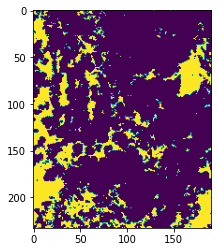

In [103]:
plt.imshow(consecutive_numpy)

### FC summary

Maybe I can do something where, if there is only one pixel, keep it, but if there is 2 keep that

In [96]:
def consecutive_count(tv_numpy, consecutive_numpy, required_consecutive, consec_msk_val=1):
    '''
    function to get consective count of veg (1) for each pixel across the time series

    :param numpy.array tv_numpy: 3-D array of tv[z,y,x]
    :param numpy.array consecutive_numpy: bool output array for veg (1) and non veg (0)
    :param float required_consecutive: how many consectutive 1's to be classified as veg?
    :param float consec_msk_val: what value to calculcate consectutives on
           default is veg (1)     
    '''

    for y in range(tv_numpy.shape[1]):
        for x in range(tv_numpy.shape[2]):
            # If all the values are nan then just set output to nan and carry on",
            pixel = tv_numpy[:,y,x]

            if np.all(np.isnan(pixel)):
                consecutive_numpy[y,x] = np.nan
                continue            

            # get counts of consecutive veg classifications
            counts = [len(list(group)) for label, group in groupby(pixel[(~np.isnan(pixel))]) if label == 1]

            if not counts:
                consecutive_numpy[y,x] = 0
            elif max(counts) >= required_consecutive:
                consecutive_numpy[y,x] = 1
            else:
                consecutive_numpy[y,x] = 0

    return consecutive_numpy

In [ ]:
data_nan = masking.mask_invalid_data(data)

# Create water and low-quality fc masks
no_water = np.invert( (data['water'] == 128) | (data['water'] == 132) )
high_ue = (data['UE'] > 30) & no_water

# Set to null areas with high UE, but no water
data_nan = data_nan.where(np.invert(high_ue))

# Don't need this anymore
data_nan = data_nan.drop("UE")
del high_ue

# Where there's water, set PV to 0
data_nan['PV'] = data_nan.PV.where(no_water, 0)
data_nan['NPV'] = data_nan.NPV.where(no_water, 0)

# Where there's water, set BS to 100
data_nan['BS'] = data_nan.BS.where(no_water, 100)

# don't need this anymore
data_nan = data_nan.drop("water")
del no_water

data_month = data_nan.groupby('time.month').median(dim='time')    

# Create mask where PV > BS
PV_dominant = data_month['PV'] > data_month['BS']
PV_dominant_nan = PV_dominant.where((data_month['PV'] >= 0) & (data_month['BS'] >= 0))

# Create mask where NPV > BS
NPV_dominant = data_month['NPV'] > data_month['BS']
NPV_dominant_nan = NPV_dominant.where((data_month['NPV'] >= 0) & (data_month['BS'] >= 0))

# Veg where PV or NPV are greater than BS
tv_mask = (PV_dominant_nan + NPV_dominant_nan)

# make values of 2 == 1 (end result in binary veg mask)
tv_mask_drop = np.where(tv_mask == 2, 1, tv_mask)
tv_mask_xr = xr.DataArray(tv_mask_drop, coords=tv_mask.coords, dims=tv_mask.dims)

# executing consecutive_count function #
# veg = 2 consecutive months
required_consecutive = 2

# Pull tv as numpy array
tv_numpy = tv_mask_xr.values

# Set up array for output (faster to pre-allocate for numba).
# Needs to be float32 for NaN
consecutive_numpy = np.empty((tv_numpy.shape[1], tv_numpy.shape[2]), dtype=np.float32)

# Run function to get array of with 1 where number of consecutive values for different
# dates is >= required_consecutive
consecutive_numpy = self.consecutive_count(tv_numpy, consecutive_numpy, required_consecutive)

# reduce original array to 2D
# using max here but not important as we just want to use shape/attributes
tv_reduce = tv_mask.max(dim='month')

# create new data array with sampe dimensions as original
tv_summary = xr.DataArray(consecutive_numpy, coords=tv_reduce.coords, dims=tv_reduce.dims)  
return tv_summary.to_dataset(name='fc_veg')

### Apply salt index

Water and salt do not have similar index values, and salt is at extremes:
- SI2
- SI3
- SI4
- SI5
- SI6
- SI7
- SI10
- BI
- VSSI


In [168]:
ds = gm

In [169]:
# Salt index list:
ds['si1'] = ds['blue']/ds['red']
ds['si2'] = ds['blue']-(ds['red']/ds['blue'])+ds['red']
ds['si3'] = (ds['green']*ds['red'])/ds['blue']
ds['si4'] = np.sqrt(ds['red']*ds['blue'])
ds['si5'] = (ds['blue']*ds['red'])/ds['green']
ds['si6'] = (ds['red']*ds['nir'])/ds['green']
ds['si7'] = np.sqrt(ds['green']*ds['red'])
ds['si8'] = np.sqrt((ds['green']**2)*(ds['red']**2)*(ds['nir']**2))
ds['si9'] = np.sqrt((ds['green']**2)*(ds['red']**2))
ds['si10'] = (ds['nir']-ds['swir1'])/(ds['nir']+ds['swir1'])
ds['sr'] = ds['nir']/ds['red']
ds['ndsi'] = (ds['red']-ds['nir'])/(ds['red']+ds['nir'])
ds['sia'] = (ds['red']/ds['blue'])*100
ds['sit'] = (ds['red']/ds['nir'])*100
ds['bi'] = np.sqrt(ds['red']**2+ds['nir']**2)
ds['pd'] = ds['nir']/(ds['nir']+ds['red'])
ds['ipvi'] = ds['nir']/(ds['nir']+ds['red'])
ds['dvi'] = ds['nir']-ds['red']
ds['ndvi'] = (ds['nir']-ds['red'])/(ds['nir']+ds['red'])             
ds['cosri'] = ((ds['blue']+ds['green'])/(ds['red']+ds['nir']))*ds['ndvi']
ds['savi'] = 1.5*(ds['nir']+ds['red'])/(ds['nir']+ds['red']+0.5)
ds['evi'] = 2.5*((ds['nir']-ds['red'])/(ds['nir']+6*ds['red']-7.5*ds['blue']+1))
ds['gdvi'] = (ds['nir']**2-ds['red']**2)/(ds['nir']**2+ds['red']**2)
ds['msi'] = ds['swir1']/ds['nir']
ds['vssi'] =  2*ds['green']-5*(ds['red']+ds['nir'])

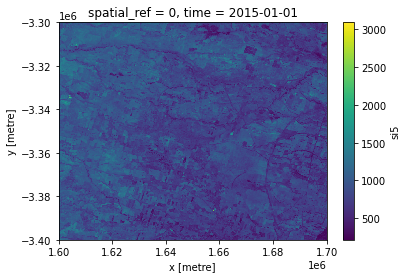

In [170]:
(ds.si5.squeeze()).plot.imshow()

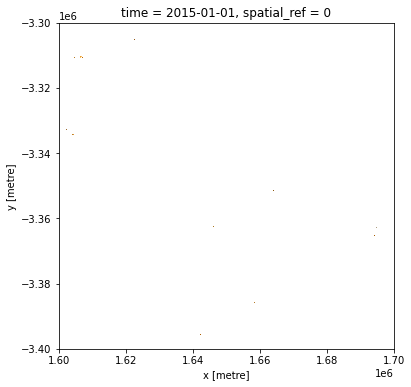

In [171]:
# Keep salty areas
masked = gm.where(ds.si2>4000)
rgb(masked,bands=['red','green','blue'])

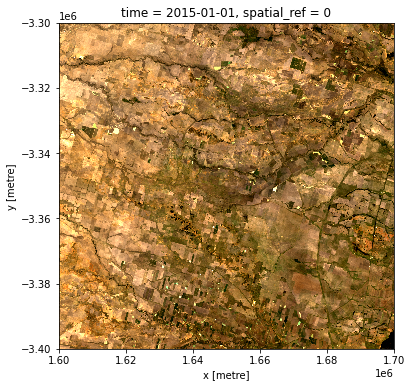

In [172]:
rgb(gm,bands=['red','green','blue'])

In [147]:
# Export

index_dict = ['si1','si2','si3','si4','si5','si6','si7','si8','si9','si10','sr','ndsi','sia','sit','bi','pd','ipvi','dvi','ndvi','cosri','savi','evi','gdvi','msi','vssi']
test_dict = ['si2','si3','si4','si5','si6','si7','si8','si9','si10','sit','bi','vssi']

for i in test_dict:
    dataset = ds[i].isel(time=0).to_dataset(name=i)
    write_geotiff('salt_indices/'+area_name+'_'+i+'.tif', dataset)

/env/lib/python3.6/site-packages/datacube/helpers.py:34: DeprecationWarning: Function datacube.helpers.write_geotiff is deprecated,
please use datacube.utils.cog.write_cog instead
  category=DeprecationWarning)
/env/lib/python3.6/site-packages/datacube/helpers.py:34: DeprecationWarning: Function datacube.helpers.write_geotiff is deprecated,
please use datacube.utils.cog.write_cog instead
  category=DeprecationWarning)
/env/lib/python3.6/site-packages/datacube/helpers.py:34: DeprecationWarning: Function datacube.helpers.write_geotiff is deprecated,
please use datacube.utils.cog.write_cog instead
  category=DeprecationWarning)
/env/lib/python3.6/site-packages/datacube/helpers.py:34: DeprecationWarning: Function datacube.helpers.write_geotiff is deprecated,
please use datacube.utils.cog.write_cog instead
  category=DeprecationWarning)
/env/lib/python3.6/site-packages/datacube/helpers.py:34: DeprecationWarning: Function datacube.helpers.write_geotiff is deprecated,
please use datacube.util